In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [74]:
# Read from extracted data
data = pd.read_csv("../data/flights-2022-10-26_0906.csv")

# Take copy to measure data loss after clean-up
flights_df = data.copy()

In [75]:
flights_df.set_index(flights_df.columns[0], inplace=True)
flights_df.index.name = None

In [76]:
flights_df.head()

,mkt_carrier,mkt_carrier_fl_num,fl_date,branded_code_share,op_unique_carrier,op_carrier_fl_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,...,mean_arr_delay_carrier_origin_date,mean_dep_delay_carrier_origin_date_t-1_week,mean_arr_delay_carrier_origin_date_t-1_week,mean_dep_delay_carrier_origin_date_t-1_week_week_number,mean_arr_delay_carrier_origin_date_t-1_week_week_number,mean_dep_delay_carrier_origin_datet-1_year_week,mean_arr_delay_carrier_origin_datet-1_year_week,mean_dep_delay_carrier_origin_date_t-1_year_month,mean_arr_delay_carrier_origin_date_t-1_year_month,crs_dep_time_dt
0,AA,5159,2019-03-08,AA_CODESHARE,OH,5159,11057,"Charlotte, NC",11267,"Dayton, OH",...,3.787932,8.587573,3.787932,8.587573,3.787932,NaN,NaN,NaN,NaN,1900-01-01 22:12:00
1,AA,5160,2019-03-08,AA_CODESHARE,OH,5160,11057,"Charlotte, NC",10980,"Chattanooga, TN",...,3.787932,8.587573,3.787932,8.587573,3.787932,NaN,NaN,NaN,NaN,1900-01-01 22:40:00
2,AA,5161,2019-03-08,AA_CODESHARE,OH,5161,11057,"Charlotte, NC",13795,"Jacksonville/Camp Lejeune, NC",...,3.787932,8.587573,3.787932,8.587573,3.787932,NaN,NaN,NaN,NaN,1900-01-01 16:13:00
3,AA,5161,2019-03-08,AA_CODESHARE,OH,5161,13795,"Jacksonville/Camp Lejeune, NC",11057,"Charlotte, NC",...,-2.025478,5.924051,-2.025478,5.924051,-2.025478,NaN,NaN,NaN,NaN,1900-01-01 17:46:00
4,AA,5162,2019-03-08,AA_CODESHARE,OH,5162,12945,"Lexington, KY",13930,"Chicago, IL",...,-2.925000,2.854037,-2.925000,2.854037,-2.925000,NaN,NaN,NaN,NaN,1900-01-01 10:09:00


In [77]:
flights_df.shape

(600000, 71)

#### EDA

Drop cancelled and diverted flights

In [78]:
flights_df = flights_df[(flights_df['cancelled'] != 1) & (flights_df['diverted']!= 1)]

In [79]:
flights_df.shape

(587905, 71)

In [80]:
def explore(df,id=0,print_n_unique=True, printValues=False):
    """
    Explore dataframe data and print missing values.
    Parameters:
    - df: Dataframe.
    - id: Column number or name with the primary IDs. Default is zero.
    - print_n_unique (bool): If the number of unique values in the first column doesn't match 
        the number of rows in the df, print the number of unique values in each column to see if 
        there's another column that might serve as a unique id.
    """
    if (id==False) & (id !=0):
        pass
    elif isinstance(id,int):
    # if type(id)==int:
        print(f'Unique IDs: {len(set(df.iloc[:,0]))}. # of rows: {df.shape[0]}. Match: {len(set(df.iloc[:,0]))==df.shape[0]}')
    else:
        print(f'Unique IDs: {len(set(df[id]))}. # of rows: {df.shape[0]}. Match: {len(set(df[id]))==df.shape[0]}')
    
    # if the number of unique values in the first column doesn't match the number of rows in the df,
    # print the number of unique values in each column to see if there's another column that migh
    # serve as a unique id.
    if (print_n_unique==True):
        if len(set(df.iloc[:,0])) !=df.shape[0]: 
            for column in df.columns:
                print(len(df[column].value_counts()),'\t', column)
    
    # count amount of missing values in each column
    total = df.isnull().sum().sort_values(ascending=False) 
    # % of rows with missing data from each column
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) 

    # create a table that lists total and % of missing values starting with the highest
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 

    if (printValues == True):
        # extract the names of columns with missing values
        cols_with_missing = missing_data[missing_data.Percent > 0].index.tolist()
        print(df.dtypes[cols_with_missing])

    print(f'')
    return missing_data

explore(flights_df,print_n_unique=False)

Unique IDs: 10. # of rows: 587905. Match: False



,Total,Percent
mean_arr_delay_carrier_origin_date_t-1_year_month,587905,1.0
mean_dep_delay_carrier_origin_date_t-1_year_month,587905,1.0
mean_arr_delay_carrier_origin_datet-1_year_week,587905,1.0
mean_dep_delay_carrier_origin_datet-1_year_week,587905,1.0
cancellation_code,587905,1.0
...,...,...
origin_state,0,0.0
mkt_carrier_fl_num,0,0.0
dest_state,0,0.0
day,0,0.0


In [81]:
explore(flights_df,print_n_unique=False).head(35)

Unique IDs: 10. # of rows: 587905. Match: False



,Total,Percent
mean_arr_delay_carrier_origin_date_t-1_year_month,587905,1.000000
mean_dep_delay_carrier_origin_date_t-1_year_month,587905,1.000000
mean_arr_delay_carrier_origin_datet-1_year_week,587905,1.000000
mean_dep_delay_carrier_origin_datet-1_year_week,587905,1.000000
cancellation_code,587905,1.000000
longest_add_gtime,584510,0.994225
first_dep_time,584510,0.994225
total_add_gtime,584510,0.994225
security_delay,495668,0.843109
late_aircraft_delay,495668,0.843109


Drop and fill columns

In [82]:
# Silvia @ 2022-10-25 18:48 Function to drop columns with missing values above a given threshold:
def drop_features(df,threshold=100, show_update=True):
    """
    Drop columns in a dataframe with null values above the specified threshold.
    Parameters:
    - df: Dataframe.
    - threshold (float): Float between 0 and 100. 
        Threshold of % null values over which columns will be dropped.
    - show_update: If true, show missing values for the updated dataframe
        (calls the custom function explore)
    """ 
    
    # count amount of missing values in each column
    total = df.isnull().sum().sort_values(ascending=False) 
    # % of rows with missing data from each column
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) 

    # create a table that lists total and % of missing values starting with the highest
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 

    filter = missing_data['Percent'] > threshold
    to_drop = missing_data[filter].index.tolist()
    df.drop(to_drop, axis=1, inplace=True)
    print(f'Threshold of percentage values for dropping columns: {threshold}')
    print(f'Columns dropped: {to_drop}')
    if show_update == True:
        return explore(df,id=0,print_n_unique=False, printValues=False)

# Apply the function by uncommenting

threshold = 0.80 # Set the threshold
drop_features(flights_df,threshold=threshold)

Threshold of percentage values for dropping columns: 0.8
Columns dropped: ['mean_arr_delay_carrier_origin_date_t-1_year_month', 'mean_dep_delay_carrier_origin_date_t-1_year_month', 'mean_arr_delay_carrier_origin_datet-1_year_week', 'mean_dep_delay_carrier_origin_datet-1_year_week', 'cancellation_code', 'longest_add_gtime', 'first_dep_time', 'total_add_gtime', 'security_delay', 'late_aircraft_delay', 'carrier_delay', 'weather_delay', 'nas_delay']
Unique IDs: 10. # of rows: 587905. Match: False



,Total,Percent
mean_arr_delay_carrier_origin_date_t-1_week,235092,0.399881
mean_dep_delay_carrier_origin_date_t-1_week,235092,0.399881
mean_arr_delay_carrier_origin_date_t-1_week_week_number,235069,0.399842
mean_dep_delay_carrier_origin_date_t-1_week_week_number,235069,0.399842
mkt_carrier,0,0.000000
fl_date_week_number,0,0.000000
crs_arr_hrs,0,0.000000
crs_dep_hrs,0,0.000000
dep_hrs_ctg,0,0.000000
day_of_week,0,0.000000


In [83]:
flights_df.shape

(587905, 58)

In [84]:
flights_df.isnull().sum().tail(10)

mean_arr_delay_carrier_origin_month                             0
mean_dep_delay_carrier_origin_week                              0
mean_arr_delay_carrier_origin_week                              0
mean_dep_delay_carrier_origin_date                              0
mean_arr_delay_carrier_origin_date                              0
mean_dep_delay_carrier_origin_date_t-1_week                235092
mean_arr_delay_carrier_origin_date_t-1_week                235092
mean_dep_delay_carrier_origin_date_t-1_week_week_number    235069
mean_arr_delay_carrier_origin_date_t-1_week_week_number    235069
crs_dep_time_dt                                                 0
dtype: int64

In [85]:
# 2022-10-26 12:12: For filling in missing data in mean delay data

def fill_missing(df, dict, inplace=True):
    """
    Parameters:
    - df: dataframe to fill using `.fillna()` method.
    - dict: Dictionary with column name to fill as the key and name of column with the data to 
    fill missing values with.
    - Inplace: bool, default True.
        If True, fill in-place. Note: this will modify any other views on this object (e.g., a no-copy slice for a column in a DataFrame).
    
    """
    for column_to_fill, column_filler in dict.items():
        df[column_to_fill].fillna(df[column_filler], inplace=True)
    return df


dict = {
    'mean_dep_delay_carrier_origin_date_t-1_week': 'mean_dep_delay_carrier_origin_week', 
    'mean_arr_delay_carrier_origin_date_t-1_week': 'mean_arr_delay_carrier_origin_week',
    'mean_dep_delay_carrier_origin_date_t-1_week_week_number': 'mean_dep_delay_carrier_origin_week',
    'mean_arr_delay_carrier_origin_date_t-1_week_week_number': 'mean_arr_delay_carrier_origin_week',
    # 'mean_dep_delay_carrier_origin_datet-1_year_week': 'mean_dep_delay_carrier_origin_week', # DON'T USE THIS FOR NOW
    # 'mean_arr_delay_carrier_origin_datet-1_year_week': 'mean_arr_delay_carrier_origin_week', # DON'T USE THIS FOR NOW
    # 'mean_dep_delay_carrier_origin_date_t-1_year_month': 'mean_dep_delay_carrier_origin_month', # DON'T USE THIS FOR NOW
    # 'mean_arr_delay_carrier_origin_date_t-1_year_month': 'mean_arr_delay_carrier_origin_month' # DON'T USE THIS FOR NOW
}

# Call the function
fill_missing(flights_df,dict)
explore(flights_df) # Recheck missing values

Unique IDs: 10. # of rows: 587905. Match: False
10 	 mkt_carrier
6564 	 mkt_carrier_fl_num
28 	 fl_date
15 	 branded_code_share
26 	 op_unique_carrier
6571 	 op_carrier_fl_num
372 	 origin_airport_id
365 	 origin_city_name
372 	 dest_airport_id
365 	 dest_city_name
1270 	 crs_dep_time
1423 	 dep_time
973 	 dep_delay
158 	 taxi_out
127 	 taxi_in
1343 	 crs_arr_time
1440 	 arr_time
1013 	 arr_delay
1 	 cancelled
1 	 diverted
470 	 crs_elapsed_time
640 	 actual_elapsed_time
623 	 air_time
1539 	 distance
356 	 origin_city
7 	 origin_state
356 	 dest_city
7 	 dest_state
28 	 day
2 	 month
1 	 year
25 	 crs_arr_hrs
24 	 crs_dep_hrs
4 	 dep_hrs_ctg
7 	 day_of_week
28 	 day_of_year
5 	 week_of_year
28 	 fl_date_dt
1 	 fl_date_year
2 	 fl_date_year_month
5 	 fl_date_Monday_of_week
5 	 fl_date_week_number
5 	 fl_date_t-1_week_week_number
28 	 fl_date_t-1_week_date
1 	 fl_date_t-1_year_year
2 	 fl_date_t-1_year_month
28 	 fl_date_t-1_year_day
1237 	 mean_dep_delay_carrier_origin_month
1241 	 mea

,Total,Percent
mkt_carrier,0,0.0
fl_date_t-1_week_date,0,0.0
crs_arr_hrs,0,0.0
crs_dep_hrs,0,0.0
dep_hrs_ctg,0,0.0
day_of_week,0,0.0
day_of_year,0,0.0
week_of_year,0,0.0
fl_date_dt,0,0.0
fl_date_year,0,0.0


In [86]:
flights_df.isnull().sum()

mkt_carrier                                                0
mkt_carrier_fl_num                                         0
fl_date                                                    0
branded_code_share                                         0
op_unique_carrier                                          0
op_carrier_fl_num                                          0
origin_airport_id                                          0
origin_city_name                                           0
dest_airport_id                                            0
dest_city_name                                             0
crs_dep_time                                               0
dep_time                                                   0
dep_delay                                                  0
taxi_out                                                   0
taxi_in                                                    0
crs_arr_time                                               0
arr_time                

#### Additional features

In [87]:
# Divide the flight into short, medium, and long haul flights based on air-time

length=[]

for i in flights_df['air_time']:
    if i < (180): # less than 3 hours
        length.append('short')
    elif (i >= (180)) and (i <= (360)): #between 3 and 6 hours
        length.append('medium')
    else: length.append('long') # more than 6 hours

flights_df['haul_length'] = length   

In [88]:
# Four categories of flight time - 'Morning', 'Afternon', 'Evening', and 'Night' for crs_arr_hrs

ctg = []
for i in flights_df['crs_arr_hrs']:
    if (i>=5) and (i<12):
        ctg.append('Morning')
    elif (i>=12) and (i<16):
        ctg.append('Afternoon')
    elif (i>=16) and (i<=22):
        ctg.append('Evening')
    elif (i>22) or (i<5):
        ctg.append('Night')

flights_df['arr_hrs_ctg'] = ctg       

In [89]:
# Rename origin_state/dest_state columns to origin_region/dest_region
flights_df = flights_df.rename(columns={'origin_state': 'origin_region', 'dest_state': 'dest_region'})

In [93]:
# PR, TT, VI - are the USA territory. Split them to regions based on Google Maps.

regions_add = {
    'PR': 'South',
    'TT': 'West',
    'VI': 'South'}

flights_df = flights_df.replace({"origin_region": regions_add})
flights_df = flights_df.replace({"dest_region": regions_add})    

#### Selected columns

In [95]:
flights_df.columns

Index(['mkt_carrier', 'mkt_carrier_fl_num', 'fl_date', 'branded_code_share',
       'op_unique_carrier', 'op_carrier_fl_num', 'origin_airport_id',
       'origin_city_name', 'dest_airport_id', 'dest_city_name', 'crs_dep_time',
       'dep_time', 'dep_delay', 'taxi_out', 'taxi_in', 'crs_arr_time',
       'arr_time', 'arr_delay', 'cancelled', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'distance', 'origin_city',
       'origin_region', 'dest_city', 'dest_region', 'day', 'month', 'year',
       'crs_arr_hrs', 'crs_dep_hrs', 'dep_hrs_ctg', 'day_of_week',
       'day_of_year', 'week_of_year', 'fl_date_dt', 'fl_date_year',
       'fl_date_year_month', 'fl_date_Monday_of_week', 'fl_date_week_number',
       'fl_date_t-1_week_week_number', 'fl_date_t-1_week_date',
       'fl_date_t-1_year_year', 'fl_date_t-1_year_month',
       'fl_date_t-1_year_day', 'mean_dep_delay_carrier_origin_month',
       'mean_arr_delay_carrier_origin_month',
       'mean_dep_delay_carrie

In [96]:
# # data_features = [
#     'origin_state',
#     'dest_state',
#     'arr_hrs_ctg',
#     'dep_hrs_ctg',
#     'day', 
#     'month',
#     'day_of_week',
#     'haul_length',

#    'fl_date_dt', 
#    'fl_date_year',
#    'fl_date_year_month', 
#    'fl_date_Monday_of_week', 
#    'fl_date_week_number',

# # mean_arr_delay_carrier_origin_date_t-1_year_month	<--- filled from mean_arr_delay_carrier_origin_month
# # mean_dep_delay_carrier_origin_date_t-1_year_month	<--- filled from mean_dep_delay_carrier_origin_month
# # mean_arr_delay_carrier_origin_datet-1_year_week	<--- filled from mean_arr_delay_carrier_origin_week	
# # mean_dep_delay_carrier_origin_datet-1_year_week 	<--- filled from mean_dep_delay_carrier_origin_week	




# # mean_arr_delay_carrier_origin_date_t-1_week    <--- filled from mean_arr_delay_carrier_origin_date	
# # mean_dep_delay_carrier_origin_date_t-1_week    <--- filled from mean_dep_delay_carrier_origin_date	
# # mean_arr_delay_carrier_origin_date_t-1_week_week_number <--- frilled from mean_arr_delay_carrier_origin_week	
# # mean_dep_delay_carrier_origin_date_t-1_week_week_number <--- filled from mean_dep_delay_carrier_origin_week	






#     'mean_dep_delay_carrier_origin_month',
#     'mean_arr_delay_carrier_origin_month',
#     'mean_dep_delay_carrier_origin_week',
#     'mean_arr_delay_carrier_origin_week',
#     'mean_dep_delay_carrier_origin_date',
#     'mean_arr_delay_carrier_origin_date',
#     'mean_dep_delay_carrier_origin_date_t-1_week',
#     'mean_arr_delay_carrier_origin_date_t-1_week',
#     'mean_dep_delay_carrier_origin_date_t-1_week_week_number',
#     'mean_arr_delay_carrier_origin_date_t-1_week_week_number',
#     'mean_dep_delay_carrier_origin_datet-1_year_week',
#     'mean_arr_delay_carrier_origin_datet-1_year_week',
#     'mean_dep_delay_carrier_origin_date_t-1_year_month',
#     'mean_arr_delay_carrier_origin_date_t-1_year_month',
#     'crs_dep_time_dt'
# # ]


# # data_columns = [
#     'mkt_carrier_fl_num', 
#     'fl_date'    
#     'mkt_unique_carrier',
#     'branded_code_share',
#     'op_unique_carrier', 
#     'op_carrier_fl_num', 
#     'origin_airport_id',
#     'dest_airport_id',
#     'dep_delay',
#     'arr_delay',
#     'crs_dep_time',
#     'crs_arr_time',
#     'crs_elapsed_time',
#     'actual_elapsed_time', 
#     'air_time', 
#     'distance'
# # ]



In [98]:
flights_df = flights_df[[
    'mkt_carrier_fl_num', 
    # 'fl_date',    <--- deleted for modeling
    # 'branded_code_share',    <--- deleted for modeling
    # 'op_unique_carrier',     <--- deleted for modeling
    'op_carrier_fl_num', 
    'origin_airport_id',
    'dest_airport_id',
    'dep_delay',
    'arr_delay',
    'crs_dep_time',
    'crs_arr_time',
    'crs_elapsed_time',
    'actual_elapsed_time', 
    'air_time', 
    'distance', 
    'origin_region',
    'dest_region',
    'arr_hrs_ctg',
    'dep_hrs_ctg', 
    'month',
    'day_of_week',
    'haul_length',
    # 'fl_date_dt',     <--- deleted for modeling
    'fl_date_year',
    # 'fl_date_year_month',     <--- deleted for modeling
    # 'fl_date_Monday_of_week',     <--- deleted for modeling
    'fl_date_week_number',
    'mean_dep_delay_carrier_origin_month',
    'mean_arr_delay_carrier_origin_month',
    'mean_dep_delay_carrier_origin_week',
    'mean_arr_delay_carrier_origin_week',
    'mean_dep_delay_carrier_origin_date',
    'mean_arr_delay_carrier_origin_date',
    'mean_dep_delay_carrier_origin_date_t-1_week',
    'mean_arr_delay_carrier_origin_date_t-1_week',
    'mean_dep_delay_carrier_origin_date_t-1_week_week_number',
    'mean_arr_delay_carrier_origin_date_t-1_week_week_number',
    # 'crs_dep_time_dt'     <--- deleted for modeling
   ]]

In [99]:
flights_df.shape

(587905, 31)

#### Categorical variables convert to a numerical 

In [100]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587905 entries, 0 to 599999
Data columns (total 31 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   mkt_carrier_fl_num                                       587905 non-null  int64  
 1   op_carrier_fl_num                                        587905 non-null  int64  
 2   origin_airport_id                                        587905 non-null  int64  
 3   dest_airport_id                                          587905 non-null  int64  
 4   dep_delay                                                587905 non-null  float64
 5   arr_delay                                                587905 non-null  float64
 6   crs_dep_time                                             587905 non-null  int64  
 7   crs_arr_time                                             587905 non-null  int64  
 8   crs_elapsed_ti

In [101]:
#show all columns that have a class of object
flights_df.dtypes[flights_df.dtypes == 'object']

origin_region    object
dest_region      object
arr_hrs_ctg      object
dep_hrs_ctg      object
day_of_week      object
haul_length      object
dtype: object

In [102]:
# Categorical variables convert to a numerical 
flights_df = pd.get_dummies(flights_df)

In [103]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587905 entries, 0 to 599999
Data columns (total 51 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   mkt_carrier_fl_num                                       587905 non-null  int64  
 1   op_carrier_fl_num                                        587905 non-null  int64  
 2   origin_airport_id                                        587905 non-null  int64  
 3   dest_airport_id                                          587905 non-null  int64  
 4   dep_delay                                                587905 non-null  float64
 5   arr_delay                                                587905 non-null  float64
 6   crs_dep_time                                             587905 non-null  int64  
 7   crs_arr_time                                             587905 non-null  int64  
 8   crs_elapsed_ti

In [104]:
flights_df.columns

Index(['mkt_carrier_fl_num', 'op_carrier_fl_num', 'origin_airport_id',
       'dest_airport_id', 'dep_delay', 'arr_delay', 'crs_dep_time',
       'crs_arr_time', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'distance', 'month', 'fl_date_year', 'fl_date_week_number',
       'mean_dep_delay_carrier_origin_month',
       'mean_arr_delay_carrier_origin_month',
       'mean_dep_delay_carrier_origin_week',
       'mean_arr_delay_carrier_origin_week',
       'mean_dep_delay_carrier_origin_date',
       'mean_arr_delay_carrier_origin_date',
       'mean_dep_delay_carrier_origin_date_t-1_week',
       'mean_arr_delay_carrier_origin_date_t-1_week',
       'mean_dep_delay_carrier_origin_date_t-1_week_week_number',
       'mean_arr_delay_carrier_origin_date_t-1_week_week_number',
       'origin_region_Midwest', 'origin_region_Northeast',
       'origin_region_South', 'origin_region_West', 'dest_region_Midwest',
       'dest_region_Northeast', 'dest_region_South', 'dest_region_West

In [105]:
flights_df.head()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,dep_delay,arr_delay,crs_dep_time,crs_arr_time,crs_elapsed_time,actual_elapsed_time,...,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,haul_length_long,haul_length_medium,haul_length_short
0,5159,5159,11057,11267,-3.0,-16.0,2212,2341,89,76.0,...,1,0,0,0,0,0,0,0,0,1
1,5160,5160,11057,10980,-7.0,3.0,2240,2353,73,83.0,...,1,0,0,0,0,0,0,0,0,1
2,5161,5161,11057,13795,8.0,10.0,1613,1713,60,62.0,...,1,0,0,0,0,0,0,0,0,1
3,5161,5161,13795,11057,29.0,25.0,1746,1905,79,75.0,...,1,0,0,0,0,0,0,0,0,1
4,5162,5162,12945,13930,37.0,35.0,1009,1049,100,98.0,...,1,0,0,0,0,0,0,0,0,1


### Preprocessing

<AxesSubplot:xlabel='Delay (minutes)', ylabel='Density (Number of flights)'>

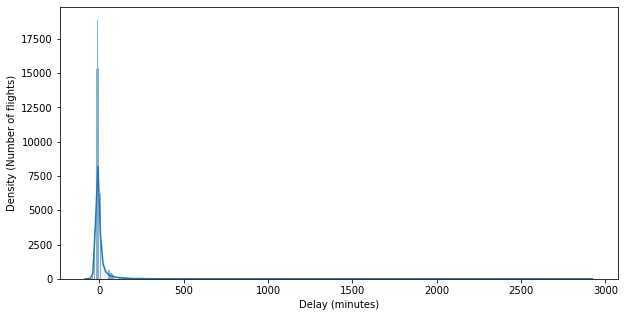

In [106]:
# Arrival Delays with outliers
fig, ax = plt.subplots(figsize = (10,5))
ax.set_ylabel('Density (Number of flights)')
ax.set_xlabel('Delay (minutes)')
sns.histplot(x = flights_df['arr_delay'], kde = True)

In [107]:
flights_df.arr_delay.describe()

count    587905.000000
mean          2.033858
std          46.461975
min         -84.000000
25%         -16.000000
50%          -8.000000
75%           4.000000
max        2923.000000
Name: arr_delay, dtype: float64

In [108]:
# Upper limit and lower limit using 3 standard deviations.
upper = flights_df.arr_delay.mean() + 3 * flights_df.arr_delay.std()
lower = flights_df.arr_delay.mean() - 3 * flights_df.arr_delay.std()
print(upper)
print(lower)

141.4197835339717
-137.35206851198686


In [111]:
# Filter out the outliers
flights_df = flights_df[(flights_df.arr_delay < upper) & (flights_df.arr_delay > lower)]

<AxesSubplot:xlabel='Delay (minutes)', ylabel='Density (Number of flights)'>

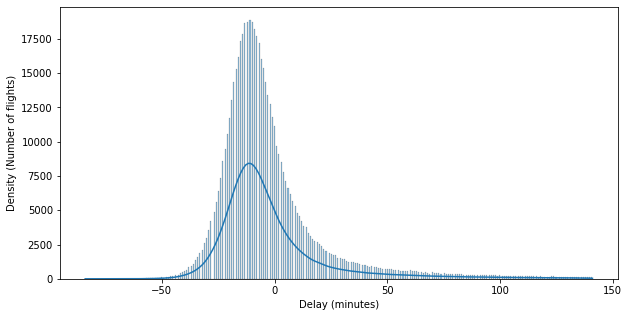

In [112]:
# Arrival Delays without outliers
fig, ax = plt.subplots(figsize = (10,5))
ax.set_ylabel('Density (Number of flights)')
ax.set_xlabel('Delay (minutes)')

sns.histplot(x = flights_df['arr_delay'], kde = True)

<AxesSubplot:xlabel='Delay (minutes)', ylabel='Density (Number of flights)'>

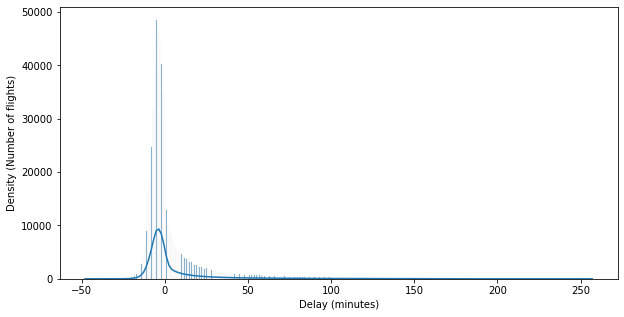

In [113]:
# Departure Delays with outliers
fig, ax = plt.subplots(figsize = (10,5))
ax.set_ylabel('Density (Number of flights)')
ax.set_xlabel('Delay (minutes)')
sns.histplot(x = flights_df['dep_delay'], kde = True)

In [114]:
flights_df.arr_delay.describe()

count    579038.000000
mean         -1.942655
std          25.008914
min         -84.000000
25%         -16.000000
50%          -8.000000
75%           3.000000
max         141.000000
Name: arr_delay, dtype: float64

In [115]:
# Upper limit and lower limit using 3 standard deviations.
upper = flights_df.arr_delay.mean() + 3 * flights_df.arr_delay.std()
lower = flights_df.arr_delay.mean() - 3 * flights_df.arr_delay.std()
print(upper)
print(lower)

73.08408618720901
-76.96939595962465


In [116]:
# Filter out the outliers
flights_df = flights_df[(flights_df.arr_delay < upper) & (flights_df.arr_delay > lower)]

<AxesSubplot:xlabel='Delay (minutes)', ylabel='Density (Number of flights)'>

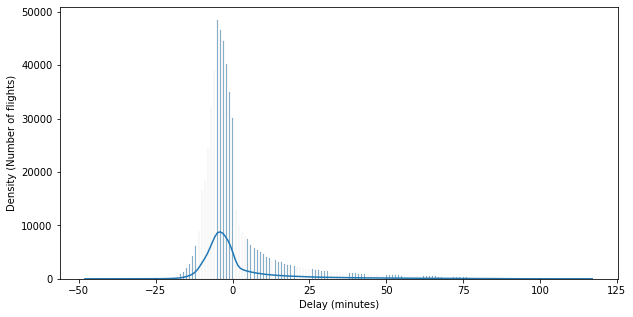

In [117]:
# Departure Delays without outliers
fig, ax = plt.subplots(figsize = (10,5))
ax.set_ylabel('Density (Number of flights)')
ax.set_xlabel('Delay (minutes)')

sns.histplot(x = flights_df['dep_delay'], kde = True)

#### Save

In [118]:
# Save the file to CSV
from datetime import datetime
datetime_now = datetime.now().strftime('%Y-%m-%d_%H%M')
filename = f'flights_cleaned_no_outliers_{datetime_now}.csv'
print(filename)

flights_cleaned_no_outliers_2022-10-26_1451.csv


In [119]:
# Save pd as csv
flights_df.to_csv('flights_cleaned_no_outliers_2022-10-26_1451.csv', index=False)